In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pickle

N = 10000
k = 10
eps = np.finfo(float).eps

def loadBatch(filename):
    with open("./cifar-10-batches-py/" + filename, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    X = np.array(dict[b'data']/255).T
    y = np.array(dict[b'labels'])
    
    Y = np.zeros((k,N))
    for i in range(N):
        Y[y[i]][i] = 1
    
    fo.close()
    return X,Y,y

def initialize():
    W = np.random.normal(0.0, 0.01, (10,3072))
    b = np.random.normal(0.0, 0.01, (10,1))

    return W, b

def evaluateClassifier(X, W, b):
    s = np.dot(W, X) + b
    P = np.exp(s) / np.sum(np.exp(s), axis=0)
    return P

def computeCost(P, Y, W, l):
    p_y = np.multiply(Y,P).sum(axis=0)
    p_y[p_y == 0] = eps
    return -np.log(p_y).sum() / (P.shape[1] + l * np.power(W,2).sum())

def computeAccuracy(P, y):
    predictions = np.argmax(P, axis=0)
    return np.sum(predictions == y) / P.shape[1]

def computeGradients(X, Y, W, l, b):
    grad_W = np.zeros_like(W)
    grad_b = np.zeros_like(b)
    
    P = evaluateClassifier(X,W,b)
    g = -(Y-P)
    grad_b = np.dot(g,np.ones((X.shape[1],1))) / X.shape[1]
    grad_W = np.add(np.dot(g,X.T) / X.shape[1], 2*l*W)

    return grad_W, grad_b

def computeGradientsNumerically(X,Y,W,b,l):
    grad_W = np.zeros_like(W)
    grad_b = np.zeros_like(b)

    P = evaluateClassifier(X,W,b)
    c = computeCost(P,Y,W,l)
    h = 1e-6

    for i in range(b.shape[0]):
        b[i] += h
        P = evaluateClassifier(X,W,b)
        c2 = computeCost(P,Y,W,l)
        grad_b[i] = (c2 - c) / h
        b[i] -= h

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i][j] += h
            P = evaluateClassifier(X,W,b)
            c2 = computeCost(P,Y,W,l)
            grad_W[i][j] = (c2 - c) / h
            W[i][j] -= h

    return grad_W, grad_b

def compareGradients(X,Y,W,l,b):
    grad_W, grad_b = computeGradients(X,Y,W,l,b)
    grad_W_num, grad_b_num = computeGradientsNumerically(X,Y,W,b,l)
    print("Relative error for W: " + str(np.abs(grad_W - grad_W_num).sum()))
    print("Relative error for b: " + str(np.abs(grad_b - grad_b_num).sum()))

def miniBatch(W, b, l, n_epochs, n_batch, eta):
    X, Y, y = loadBatch("data_batch_1")
    X_val, Y_val, y_val = loadBatch("data_batch_2")
    X_test, Y_test, y_test = loadBatch("test_batch")

    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []

    for i in range(n_epochs):
        for j in range(0, N, n_batch):
            grad_W, grad_b = computeGradients(X[:,j:j+n_batch],Y[:,j:j+n_batch],W,l,b)
            W -= eta*grad_W
            b -= eta*grad_b
        
        P = evaluateClassifier(X,W,b)
        train_acc.append(computeAccuracy(P,y))
        train_loss.append(computeCost(P,Y,W,l))

        P_val = evaluateClassifier(X_val,W,b)
        val_acc.append(computeAccuracy(P_val,y_val))
        val_loss.append(computeCost(P_val,Y_val,W,l))

    P_test = evaluateClassifier(X_test,W,b)
    test_acc = computeAccuracy(P_test,y_test)
    test_loss = computeCost(P_test,Y_test,W,l)

    return W, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss

def run(l, n_batch, eta, n_epochs):
    W, b = initialize()
    W, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss = miniBatch(W,b,l,n_epochs,n_batch,eta)

    print("Final test accuracy: " + str(test_acc*100) + " %")
    print("Final test loss: " + str(test_loss))
    
    plt.rcParams['figure.dpi'] = 100
    
    plt.figure(1)
    plt.plot(train_loss, "r-", label="Training Data")
    plt.plot(val_loss, "b-", label="Validation Data")
    plt.title("Cost Function")
    plt.xlabel("Epochs")
    plt.ylabel("Costs")
    plt.legend()
    plt.grid("true")
#     plt.show()

    plt.figure(2)
    plt.plot(train_acc, "r-", label="Training Data")
    plt.plot(val_acc, "b-", label="Validation Data")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid("true")
    plt.show()

    plt.figure(3)
    for i, j in enumerate(W):
        plt.subplot(2, 5, i+1)
        plt.imshow(np.rot90(np.reshape((j - j.min()) / (j.max() - j.min()), (32, 32, 3), order='F'), k=3))
        plt.axis("off")

    plt.show()

Final test accuracy: 26.179999999999996%
Final test loss: 5.280034429147742


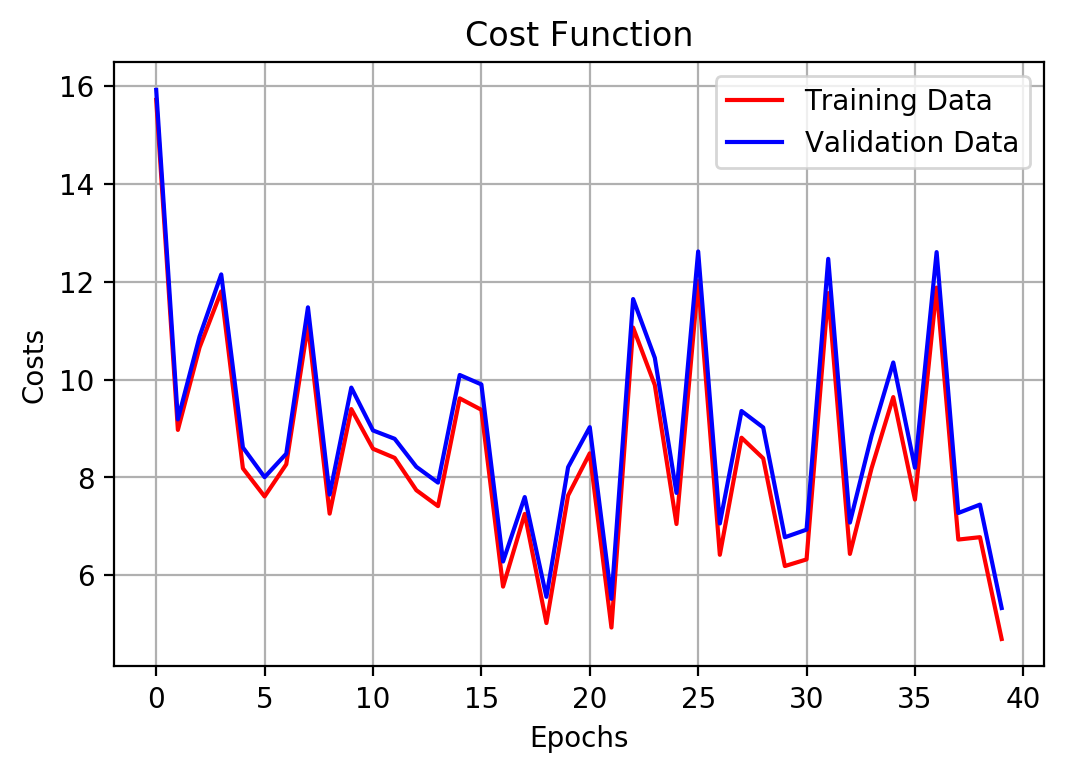

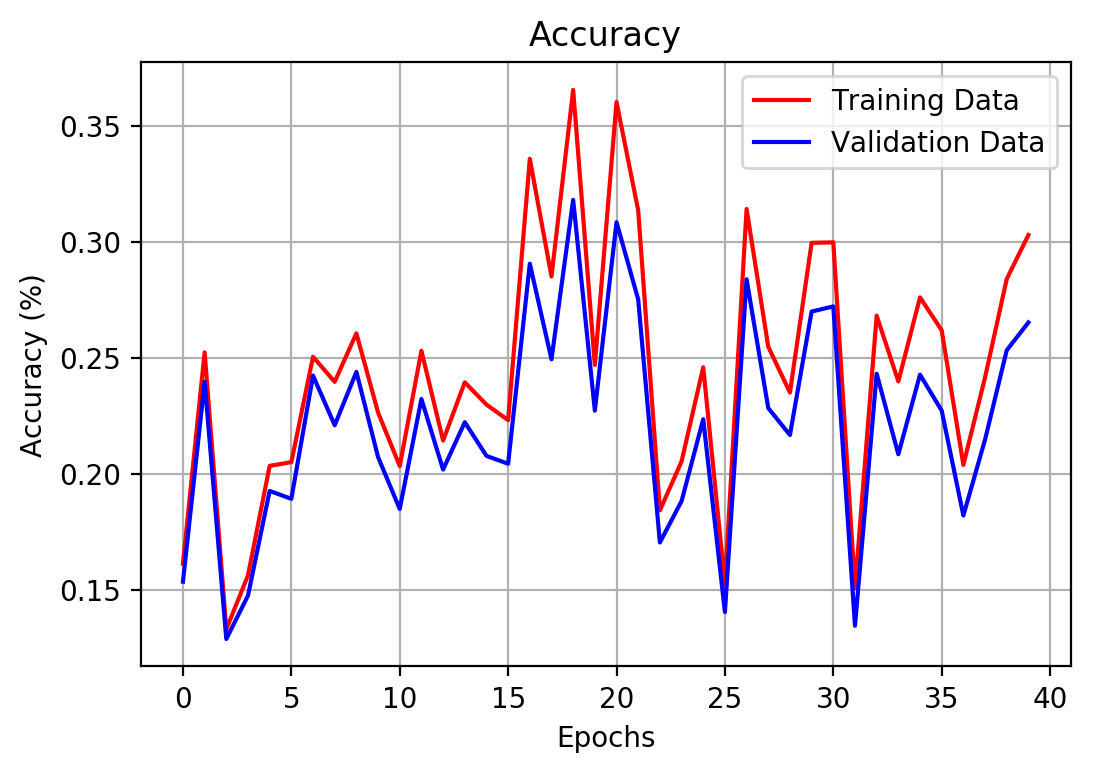

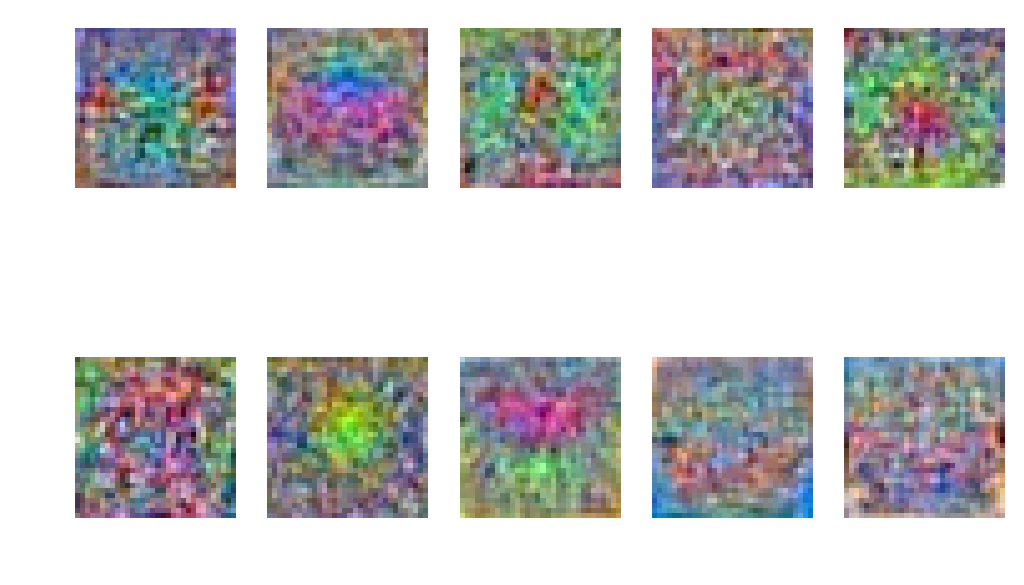

In [7]:
run(0,100,0.1,40)

Final test accuracy: 36.89%
Final test loss: 1.798780685853336


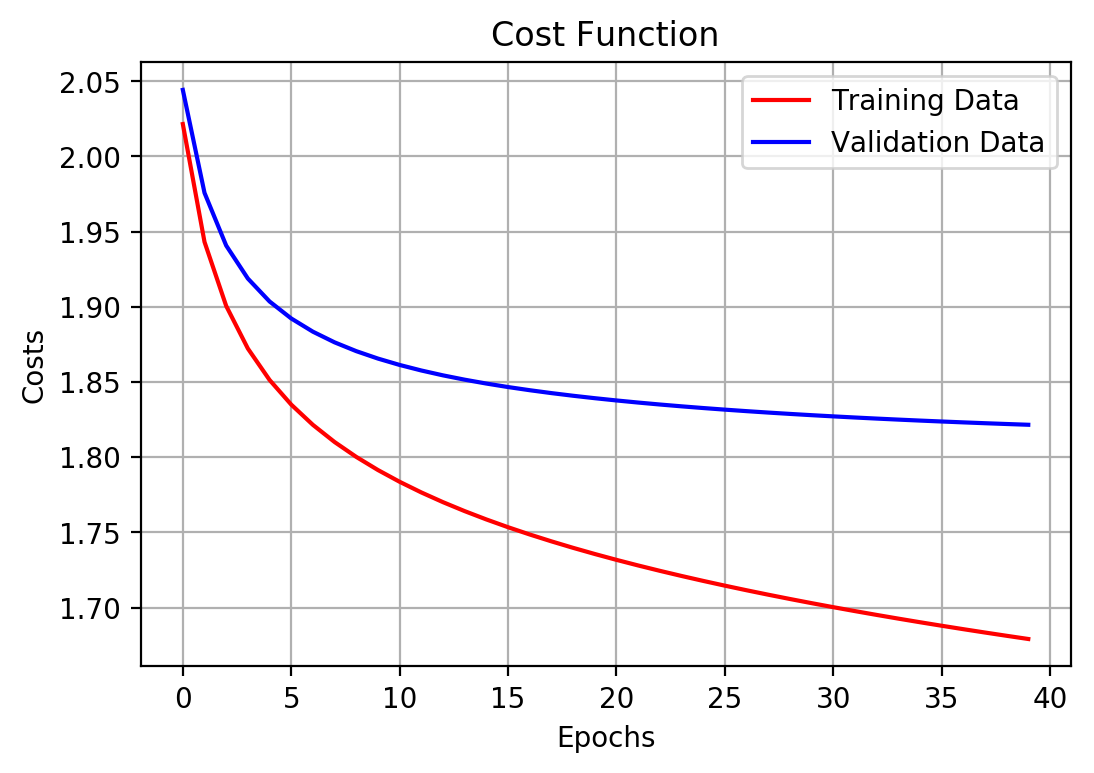

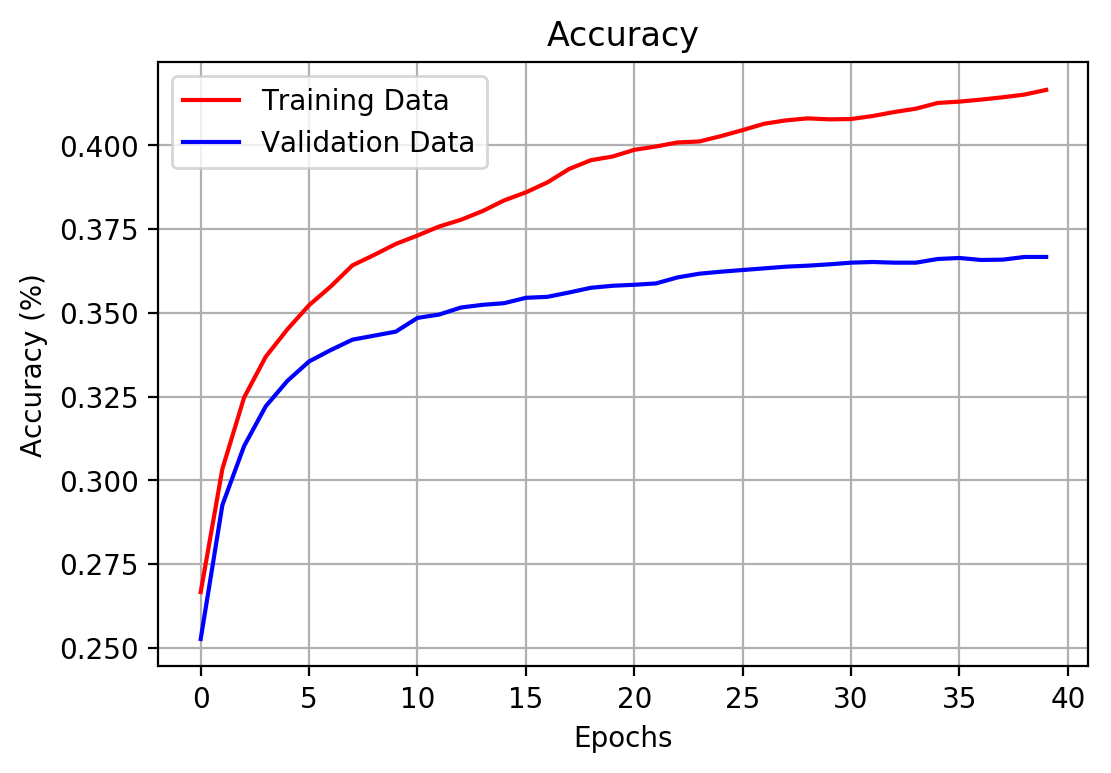

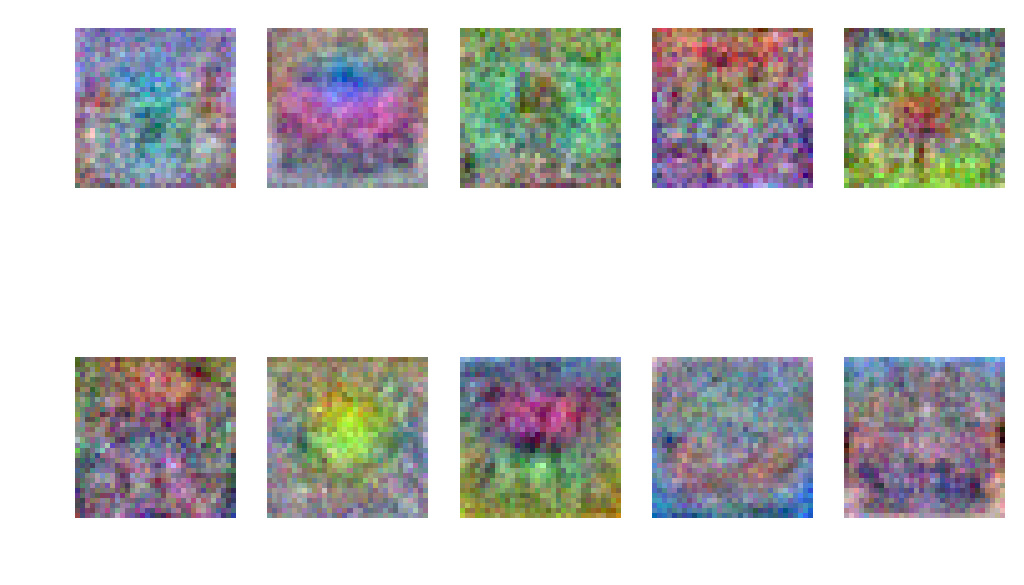

In [8]:
run(0,100,0.01,40)

Final test accuracy: 0.334
Final test loss: 1.9126221073635


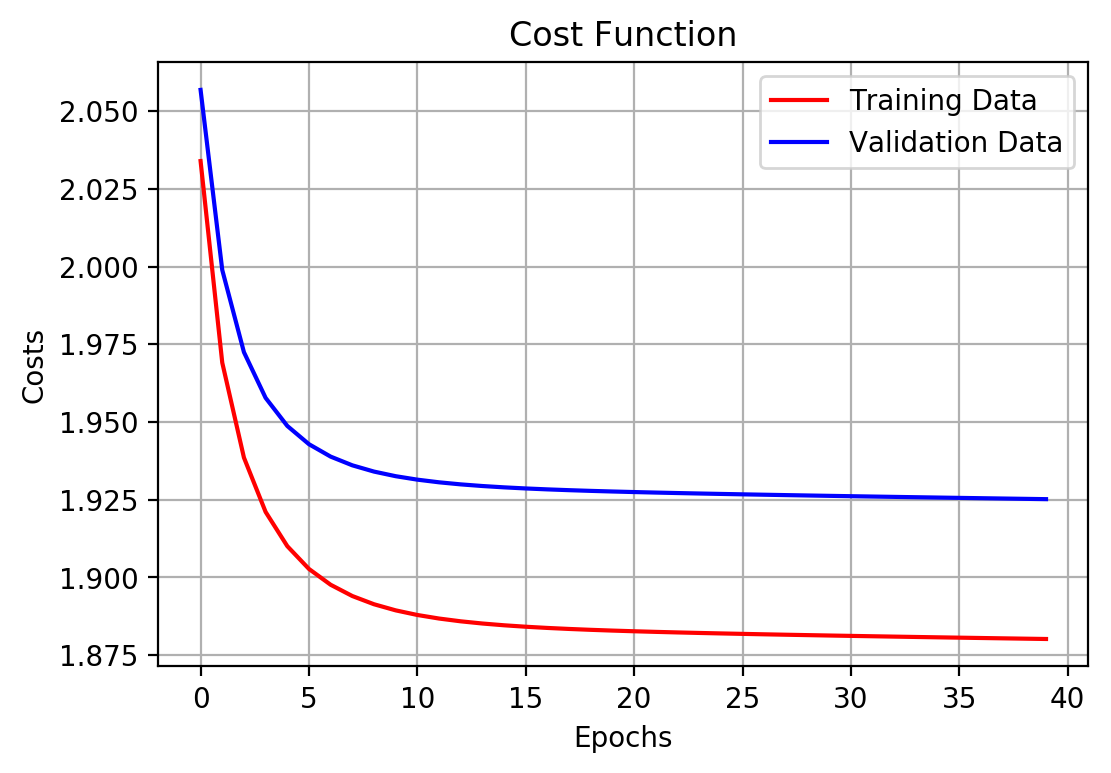

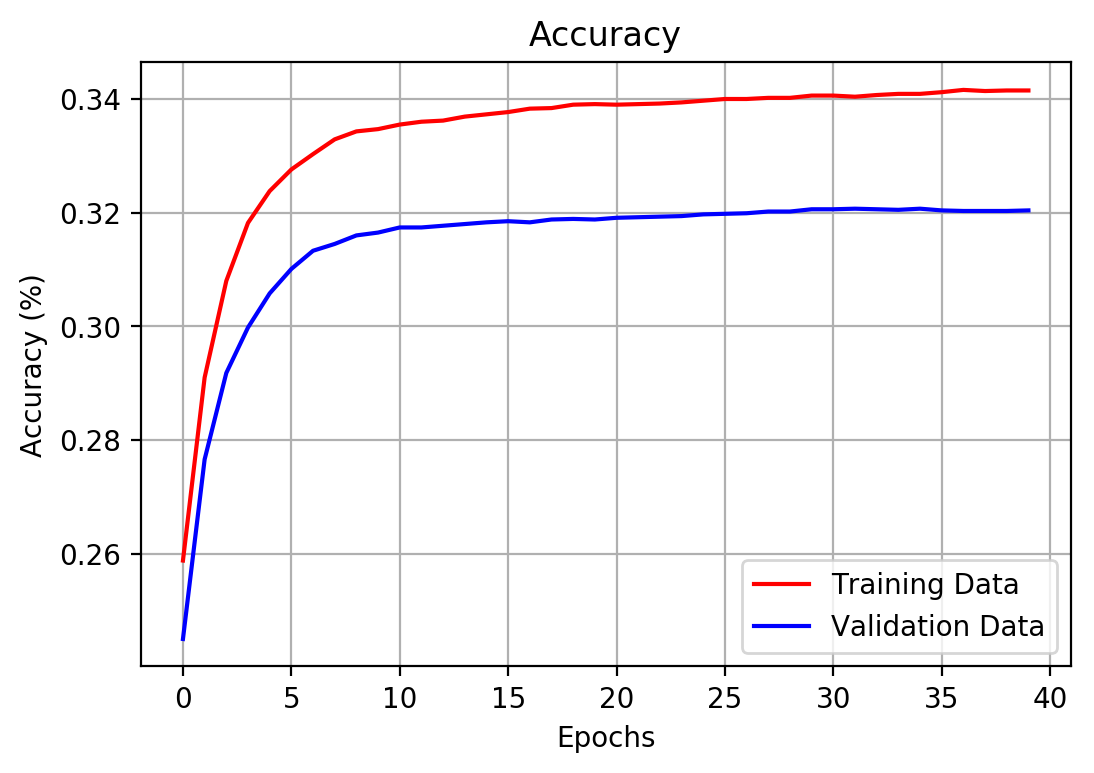

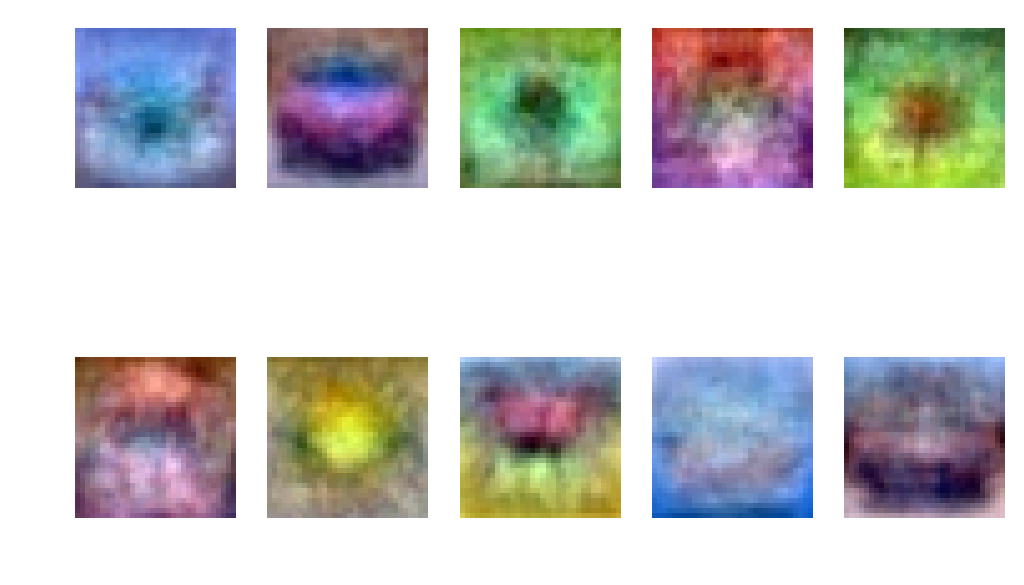

In [4]:
run(0.1,100,0.01,40)

Final test accuracy: 0.2189
Final test loss: 2.130039095911371


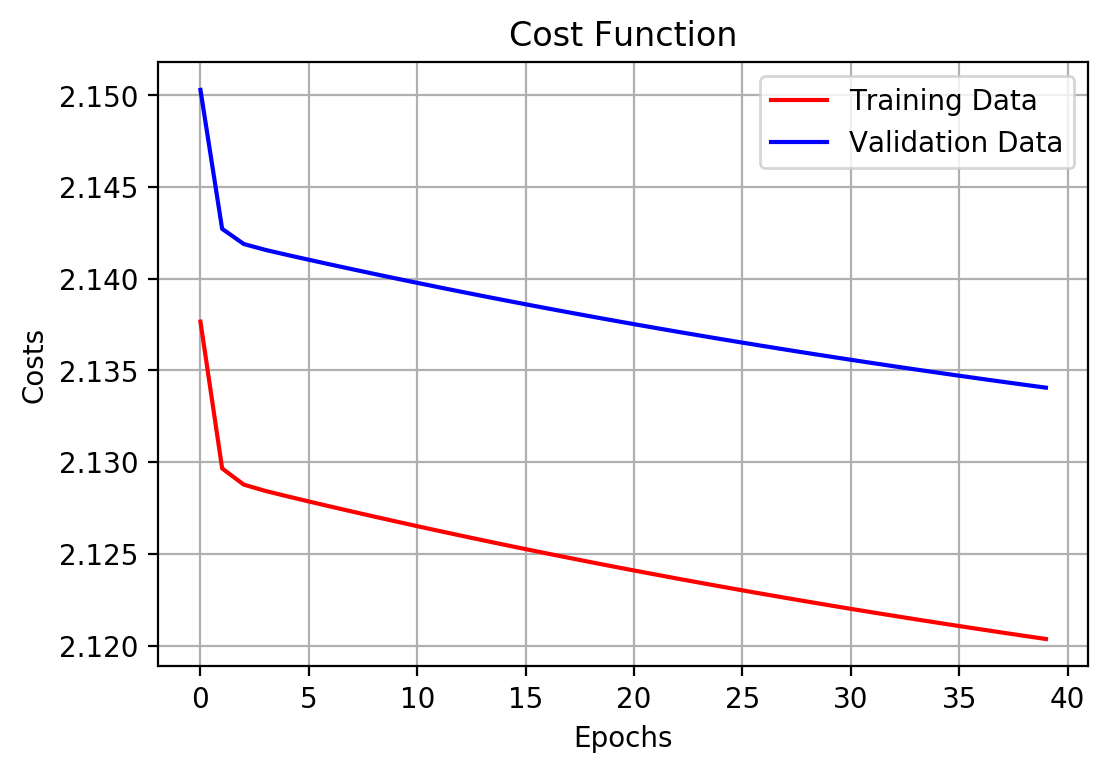

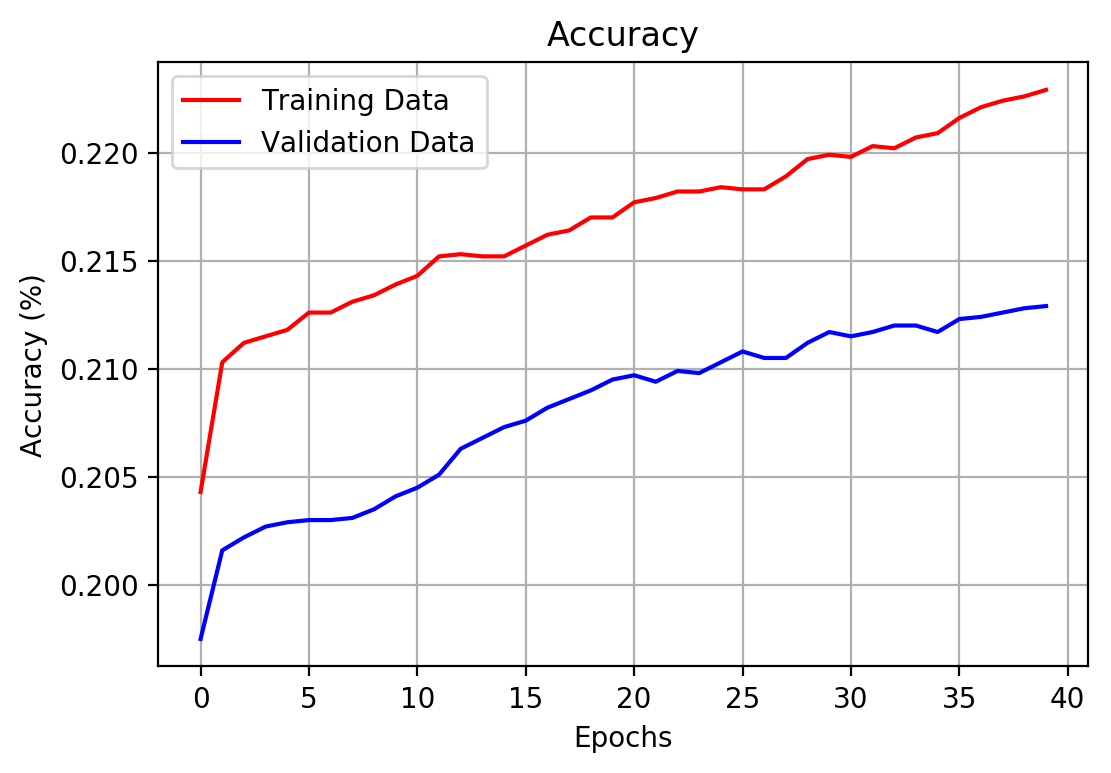

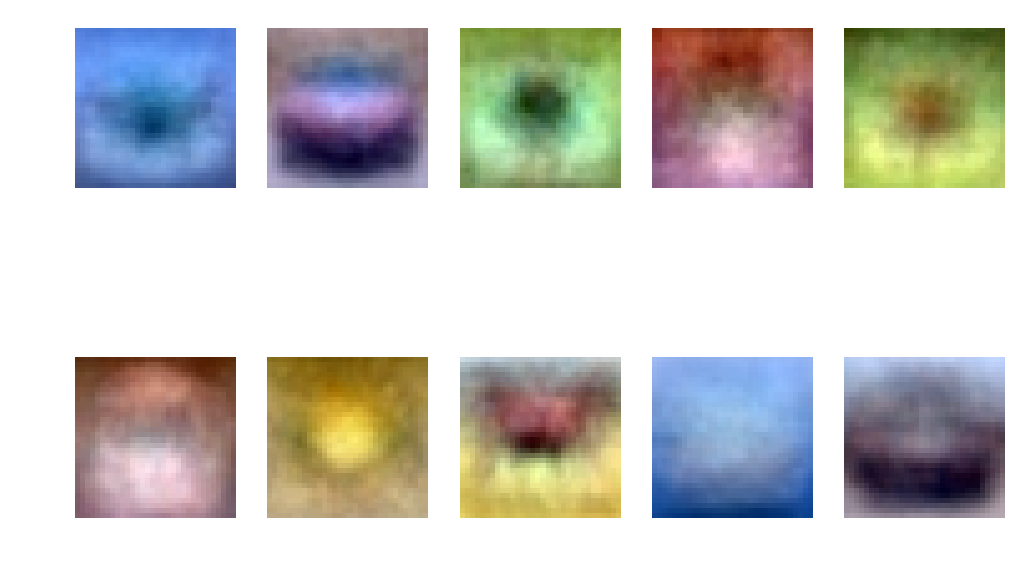

In [5]:
run(1,100,0.01,40)